# Imports:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Read in the data:

In [10]:
book_tags = pd.read_csv('../ignore/book_tags.csv')
books = pd.read_csv('../ignore/books.csv')
ratings = pd.read_csv('../ignore/ratings.csv')
tags = pd.read_csv('../ignore/tags.csv')
to_read = pd.read_csv('../ignore/to_read.csv')

In [11]:
print(book_tags.shape)
print(books.shape)
print(ratings.shape)
print(tags.shape)
print(to_read.shape)

(999912, 3)
(10000, 23)
(5976479, 3)
(34252, 2)
(912705, 2)


While more data is better... for the purpose of memory usage for this project I am going to randomly pick 50,000 data points from the over 5 million data points in the ratings.csv

In [12]:
ratings.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

> There are no missing values, so I cannot just delete null items

In [13]:
ratings.user_id.value_counts().count()

53424

> 53,424 unique users

In [14]:
ratings.book_id.value_counts().count()

10000

> 10,000 unique books

In [15]:
ratings_sample = ratings.sample(n = 50000, replace = False)

In [16]:
ratings_sample.head()

,user_id,book_id,rating
4317152,666,5352,4
1246369,18399,111,3
4521795,4882,1148,3
4081729,45945,1634,5
1962161,15082,820,5


In [17]:
ratings_sample.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [18]:
ratings_sample.user_id.value_counts().count()

32073

32,009 unique users in this sample, with some repeats

In [19]:
ratings_sample.book_id.value_counts().count()

8419

> 8,393 unique books... I want all 10,000 books included so I may re-sample

In [20]:
ratings_sample.rating.value_counts().count()

5

> All 5 different ratings are represented

Let's try a resample with 100,000 instead...

In [21]:
ratings_sample = ratings.sample(n = 100000, replace = False, random_state=1002)

In [22]:
ratings_sample.head()

,user_id,book_id,rating
2186601,29403,102,5
2858642,36128,4663,4
4280792,37112,25,5
1026306,16114,693,4
5672837,50684,1731,4


In [23]:
ratings_sample.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [24]:
ratings_sample.user_id.value_counts().count()

44364

> 44,364 unique users

In [25]:
ratings_sample.book_id.value_counts().count()

9523

> 9523 unique books... this is not the full 10,000 but close enough for my liking

In [26]:
# Checking to make sure that some of my favorite books are included in this sample... because what would a good recommender system be if it doesn't include my favorites
# ratings_sample.loc[ratings_sample['book_id'] == 30]

In [27]:
ratings_sample.to_csv('ratings_sample.csv', index=False)

In [28]:
ratings_sample.shape

(100000, 3)

Now, let's merge the book df with it

In [29]:
ratings_and_books = pd.merge(ratings_sample, books, how='left', on='book_id')
ratings_and_books.head()

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,29403,102,5,19543,19543,3020535,110,99408392,9.780099e+12,Maurice Sendak,1963.0,Where the Wild Things Are,Where the Wild Things Are,eng,4.22,620618,636061,9102,15392,27532,93700,167043,332394,https://images.gr-assets.com/books/1384434560m...,https://images.gr-assets.com/books/1384434560s...
1,36128,4663,4,64081,64081,2827103,19,310266300,9.780310e+12,Shane Claiborne,2006.0,The Irresistible Revolution: Living as an Ordi...,The Irresistible Revolution: Living as an Ordi...,NaN,4.07,18566,19186,953,409,977,3435,6486,7879,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2,37112,25,5,136251,136251,2963218,263,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574,1847395,51942,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...
3,16114,693,4,455373,455373,2651694,122,345418972,9.780345e+12,Michael Crichton,1987.0,Sphere,Sphere,eng,3.77,128244,135005,2313,1851,9728,40085,49513,33828,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4,50684,1731,4,6736971,6736971,6527274,37,345503813,9.780346e+12,Peter V. Brett,2010.0,The Desert Spear,"The Desert Spear (Demon Cycle, #2)",eng,4.24,53143,58608,1927,555,1691,7805,21853,26704,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


Make sure the counts are all the same...

In [30]:
ratings_and_books.shape

(100000, 25)

In [31]:
ratings_and_books.user_id.value_counts().count()

44364

In [32]:
ratings_and_books.book_id.value_counts().count()

9523

Let's drop unwanted columns:

In [33]:
ratings_and_books = ratings_and_books[['user_id', 'book_id', 'rating', 'authors', 'original_publication_year', 'title', 'language_code', 'average_rating', 'ratings_count']]
ratings_and_books.head()

,user_id,book_id,rating,authors,original_publication_year,title,language_code,average_rating,ratings_count
0,29403,102,5,Maurice Sendak,1963.0,Where the Wild Things Are,eng,4.22,620618
1,36128,4663,4,Shane Claiborne,2006.0,The Irresistible Revolution: Living as an Ordi...,NaN,4.07,18566
2,37112,25,5,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574
3,16114,693,4,Michael Crichton,1987.0,Sphere,eng,3.77,128244
4,50684,1731,4,Peter V. Brett,2010.0,"The Desert Spear (Demon Cycle, #2)",eng,4.24,53143


In [34]:
ratings_and_books.shape

(100000, 9)

In [35]:
ratings_and_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    100000 non-null  int64  
 1   book_id                    100000 non-null  int64  
 2   rating                     100000 non-null  int64  
 3   authors                    100000 non-null  object 
 4   original_publication_year  99897 non-null   float64
 5   title                      100000 non-null  object 
 6   language_code              94350 non-null   object 
 7   average_rating             100000 non-null  float64
 8   ratings_count              100000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ MB


> Missing values in publication year and language code

In [36]:
ratings_and_books.loc[ratings_and_books['original_publication_year'].isna() == True ].head()

,user_id,book_id,rating,authors,original_publication_year,title,language_code,average_rating,ratings_count
916,35864,3506,5,Yuu Watase,NaN,"Absolute Boyfriend, Vol. 1",eng,4.01,29385
1284,36516,5872,5,Charles Dickens,NaN,A Tale of Two Cities / Great Expectations,en-US,3.98,14912
2288,36072,7417,4,"Giles Andreae, Guy Parker-Rees",NaN,Giraffes Can't Dance,en-US,4.28,14144
4650,13903,4708,5,BookRags,NaN,BookRags Summary: A Storm of Swords,eng,4.59,18960
4938,37309,5872,3,Charles Dickens,NaN,A Tale of Two Cities / Great Expectations,en-US,3.98,14912


In [37]:
100000-99897

103

In [38]:
ratings_and_books.original_publication_year.value_counts().sort_values().head(20)

 1867.0    1
 1863.0    1
 1519.0    1
 1764.0    1
 1785.0    1
 1651.0    2
 1353.0    2
 1677.0    2
 1550.0    2
 1767.0    2
 1589.0    2
 1554.0    2
 1641.0    2
 1590.0    3
 1796.0    3
 1781.0    3
-440.0     3
 1418.0    4
 119.0     4
 1563.0    4
Name: original_publication_year, dtype: int64

In [39]:
ratings_and_books.loc[ratings_and_books['language_code'].isna() == True ].head()

,user_id,book_id,rating,authors,original_publication_year,title,language_code,average_rating,ratings_count
1,36128,4663,4,Shane Claiborne,2006.0,The Irresistible Revolution: Living as an Ordi...,NaN,4.07,18566
33,1159,9927,4,Christopher Buckley,1994.0,Thank You for Smoking,NaN,3.92,9054
62,46941,1497,2,"Mary Norton, Beth Krush, Joe Krush",1952.0,"The Borrowers (The Borrowers, #1)",NaN,4.02,74820
91,36984,4704,3,Jeanette Winterson,2011.0,Why Be Happy When You Could Be Normal?,NaN,3.94,19537
93,30813,5878,5,Diane Muldrow,1992.0,Frosty the Snowman (Frosty the Snowman),NaN,4.34,17540


In [40]:
100000 - 94350

5650

In [41]:
ratings_and_books.language_code.fillna('unknown', inplace=True)

In [42]:
ratings_and_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    100000 non-null  int64  
 1   book_id                    100000 non-null  int64  
 2   rating                     100000 non-null  int64  
 3   authors                    100000 non-null  object 
 4   original_publication_year  99897 non-null   float64
 5   title                      100000 non-null  object 
 6   language_code              100000 non-null  object 
 7   average_rating             100000 non-null  float64
 8   ratings_count              100000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ MB


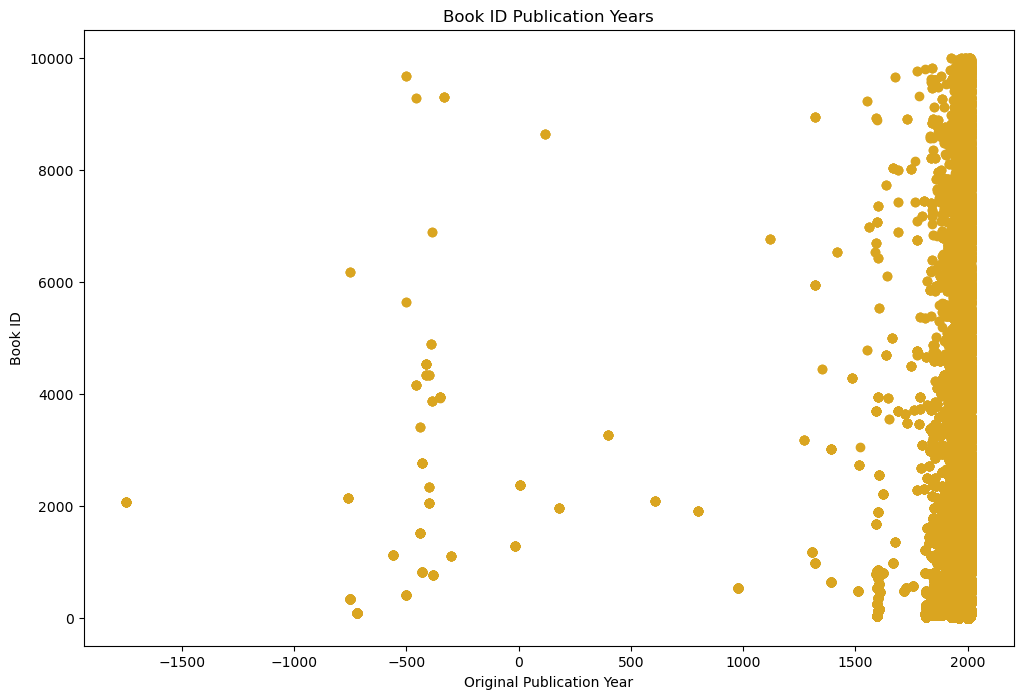

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(ratings_and_books.original_publication_year, ratings_and_books.book_id, color = 'goldenrod')
plt.ylabel('Book ID')
plt.xlabel('Original Publication Year')
plt.title('Book ID Publication Years');

# plt.savefig('book_id_pub_year.png')

In [44]:
ratings_and_books.original_publication_year.mean()

1967.8362613491897

In [45]:
def pub_date_category(publication_date):
    if publication_date < 1900:
        return "Pre-1900s"
    elif 1900 <= publication_date <= 1999:
        return "1900s"
    elif 2000 <= publication_date:
        return "2000s"
    else:
        return "Unknown"

ratings_and_books['publication_date_category'] = ratings_and_books['original_publication_year'].apply(pub_date_category)

ratings_and_books.head()

,user_id,book_id,rating,authors,original_publication_year,title,language_code,average_rating,ratings_count,publication_date_category
0,29403,102,5,Maurice Sendak,1963.0,Where the Wild Things Are,eng,4.22,620618,1900s
1,36128,4663,4,Shane Claiborne,2006.0,The Irresistible Revolution: Living as an Ordi...,unknown,4.07,18566,2000s
2,37112,25,5,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574,2000s
3,16114,693,4,Michael Crichton,1987.0,Sphere,eng,3.77,128244,1900s
4,50684,1731,4,Peter V. Brett,2010.0,"The Desert Spear (Demon Cycle, #2)",eng,4.24,53143,2000s


In [46]:
ratings_and_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    100000 non-null  int64  
 1   book_id                    100000 non-null  int64  
 2   rating                     100000 non-null  int64  
 3   authors                    100000 non-null  object 
 4   original_publication_year  99897 non-null   float64
 5   title                      100000 non-null  object 
 6   language_code              100000 non-null  object 
 7   average_rating             100000 non-null  float64
 8   ratings_count              100000 non-null  int64  
 9   publication_date_category  100000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.4+ MB


In [47]:
ratings_and_books.publication_date_category.value_counts()

2000s        51790
1900s        40769
Pre-1900s     7338
Unknown        103
Name: publication_date_category, dtype: int64

Now I can drop the original pub date column

In [48]:
ratings_and_books = ratings_and_books.drop(columns= 'original_publication_year')

In [49]:
ratings_and_books.head()

,user_id,book_id,rating,authors,title,language_code,average_rating,ratings_count,publication_date_category
0,29403,102,5,Maurice Sendak,Where the Wild Things Are,eng,4.22,620618,1900s
1,36128,4663,4,Shane Claiborne,The Irresistible Revolution: Living as an Ordi...,unknown,4.07,18566,2000s
2,37112,25,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574,2000s
3,16114,693,4,Michael Crichton,Sphere,eng,3.77,128244,1900s
4,50684,1731,4,Peter V. Brett,"The Desert Spear (Demon Cycle, #2)",eng,4.24,53143,2000s


In [50]:
ratings_and_books.authors.value_counts().count()

4424

In [51]:
ratings_and_books.book_id.value_counts().count()

9523

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_86392/1225032254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ratings_and_books.corr(), annot=True);


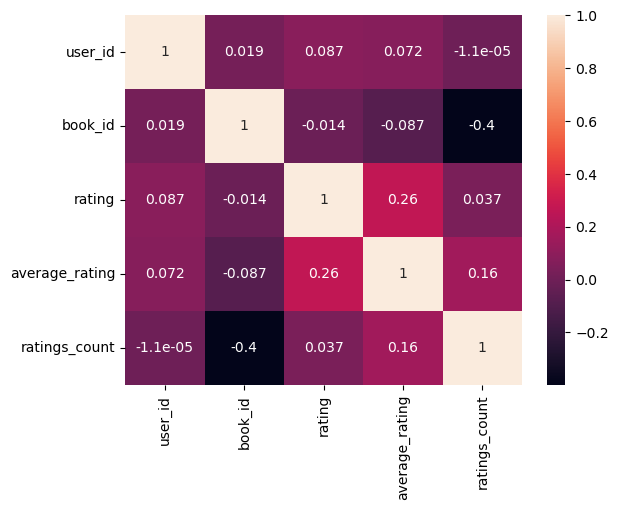

In [52]:
sns.heatmap(ratings_and_books.corr(), annot=True);

In [53]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [54]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [55]:
books_clean = books[['authors', 'original_publication_year', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count']]
books_clean.head()

,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
0,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254
1,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867
2,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009
3,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586
4,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992


In [56]:
books_clean.authors.value_counts().count()

4664

> 4664 unqiue authors

In [57]:
books_clean.original_publication_year.value_counts().count()

293

> 294 unique publication years

In [58]:
books_clean.title.value_counts().count()

9964

> 9964 unique titles

In [59]:
books_clean.language_code.value_counts().count()

25

> 25 unique lang codes. Can map to eng or non eng

In [60]:
books_clean.language_code.value_counts()

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
por         6
pol         6
en          4
nor         3
dan         3
fil         2
ita         2
vie         1
tur         1
nl          1
swe         1
rum         1
mul         1
rus         1
Name: language_code, dtype: int64

In [61]:
books_clean.average_rating.value_counts().count()

184

> 184 unique averages. can change to a scale

In [79]:
# books_clean.average_rating.value_counts().sort_index()

In [63]:
books_clean.ratings_count.min()

2716

In [64]:
books_clean.ratings_count.max()

4780653

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_86392/1421592650.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(books_clean.corr(), annot=True)


<Axes: >

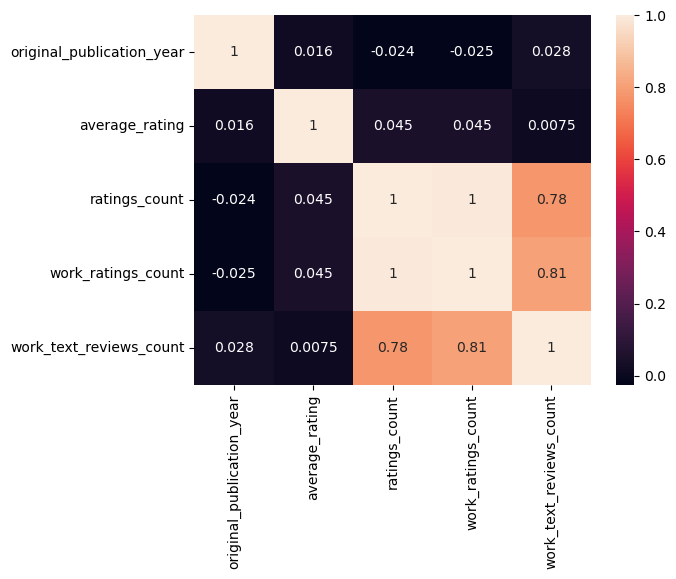

In [65]:
sns.heatmap(books_clean.corr(), annot=True)

In [66]:
books_clean.ratings_count.sum()

540012351

In [67]:
4780653/540012351

0.008852858626561303

In [68]:
(4780653*4.34)/540012351

0.03842140643927605

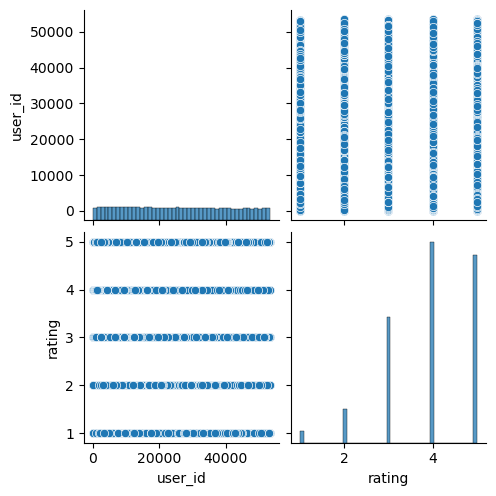

In [69]:
df = pd.read_csv('../data/recommend.csv')
sns.pairplot(df);

In [70]:
df.head()

,user_id,rating,title
0,29403,5,Where the Wild Things Are
1,37112,5,Harry Potter and the Deathly Hallows (Harry Po...
2,16114,4,Sphere
3,50684,4,"The Desert Spear (Demon Cycle, #2)"
4,43944,3,"Y: The Last Man, Vol. 1: Unmanned"


In [71]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [72]:
books.isbn.value_counts().count()

9300

In [73]:
books.isbn13.value_counts().count()

9153

In [74]:
books.loc[books.isbn.duplicated()].head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
120,121,7604,7604,1268631,370,NaN,NaN,"Vladimir Nabokov, Craig Raine",1955.0,Lolita,Lolita,eng,3.88,469836,517990,18107,21091,37205,108664,165477,185553,https://images.gr-assets.com/books/1377756377m...,https://images.gr-assets.com/books/1377756377s...
161,162,49552,49552,3324344,675,NaN,NaN,"Albert Camus, Matthew Ward",1942.0,L’Étranger,The Stranger,eng,3.96,420600,483623,14836,10563,28920,100140,174957,169043,https://images.gr-assets.com/books/1349927872m...,https://images.gr-assets.com/books/1349927872s...
187,188,10664113,10664113,2936175,115,NaN,NaN,George R.R. Martin,2011.0,A Dance with Dragons,"A Dance with Dragons (A Song of Ice and Fire, #5)",eng,4.31,365954,424618,20072,2399,10150,53744,147136,211189,https://images.gr-assets.com/books/1327885335m...,https://images.gr-assets.com/books/1327885335s...
202,203,11505797,11505797,16441531,85,NaN,NaN,Jamie McGuire,2011.0,Beautiful Disaster,"Beautiful Disaster (Beautiful, #1)",eng,4.15,418309,442696,25298,17185,23298,61993,115123,225097,https://images.gr-assets.com/books/1358259032m...,https://images.gr-assets.com/books/1358259032s...
259,260,4865,4865,2370171,353,NaN,9.780672e+12,Dale Carnegie,1936.0,How to Win Friends and Influence People,How to Win Friends and Influence People,eng,4.13,282623,305437,7909,6734,13880,50529,94743,139551,https://images.gr-assets.com/books/1442726934m...,https://images.gr-assets.com/books/1442726934s...


In [75]:
books.average_rating.value_counts().count()

184

In [76]:
books.average_rating.mean()

4.002191000000001

In [77]:
books.loc[books.average_rating >= 4].count()

book_id                      5334
goodreads_book_id            5334
best_book_id                 5334
work_id                      5334
books_count                  5334
isbn                         4894
isbn13                       4951
authors                      5334
original_publication_year    5319
original_title               4980
title                        5334
language_code                4759
average_rating               5334
ratings_count                5334
work_ratings_count           5334
work_text_reviews_count      5334
ratings_1                    5334
ratings_2                    5334
ratings_3                    5334
ratings_4                    5334
ratings_5                    5334
image_url                    5334
small_image_url              5334
dtype: int64

In [78]:
books.loc[books.average_rating < 4].count()

book_id                      4666
goodreads_book_id            4666
best_book_id                 4666
work_id                      4666
books_count                  4666
isbn                         4406
isbn13                       4464
authors                      4666
original_publication_year    4660
original_title               4435
title                        4666
language_code                4157
average_rating               4666
ratings_count                4666
work_ratings_count           4666
work_text_reviews_count      4666
ratings_1                    4666
ratings_2                    4666
ratings_3                    4666
ratings_4                    4666
ratings_5                    4666
image_url                    4666
small_image_url              4666
dtype: int64